In [5]:
import pandas as pd
import pandas_datareader as wb
import numpy as np
import matplotlib.pyplot as plt

In [6]:
short_window=40
long_window=100
aapl=wb.DataReader("AAPL",data_source="yahoo",start="2018-1-1",end="2019-1-1")["Adj Close"]

In [7]:

signals=pd.DataFrame(index=aapl.index)
signals["signal"]=0.0


In [8]:
signals['short_mavg']=aapl.rolling(window=short_window,min_periods=1,center=False).mean()

In [9]:
signals['long_mavg']=aapl.rolling(window=long_window,min_periods=1,center=False).mean()

In [10]:
signals['signal'][short_window:]=np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:],1.0,0.0)

In [11]:
signals['positions']=signals['signal'].diff()

In [12]:
print(signals)

            signal  short_mavg  long_mavg  positions
Date                                                
2018-01-02     0.0   41.105534  41.105534        NaN
2018-01-03     0.0   41.101954  41.101954        0.0
2018-01-04     0.0   41.164392  41.164392        0.0
2018-01-05     0.0   41.313134  41.313134        0.0
2018-01-08     0.0   41.371360  41.371360        0.0
...            ...         ...        ...        ...
2018-12-24     0.0   44.589144  49.549245        0.0
2018-12-26     0.0   44.235655  49.431105        0.0
2018-12-27     0.0   43.900488  49.309050        0.0
2018-12-28     0.0   43.559409  49.184592        0.0
2018-12-31     0.0   43.193924  49.068506        0.0

[251 rows x 4 columns]


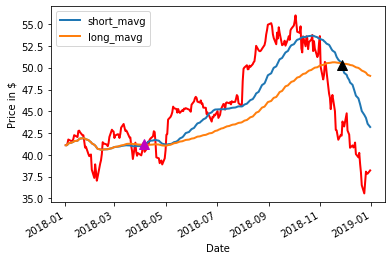

In [13]:
fig=plt.figure()
ax1=fig.add_subplot(111,ylabel='Price in $')
aapl.plot(ax=ax1,color='r',lw=2.)
signals[['short_mavg','long_mavg']].plot(ax=ax1,lw=2.)

#buy signals
ax1.plot(signals.loc[signals.positions==1.0].index,signals.short_mavg[signals.positions==1.0],'^',markersize=10,color='m')

#plot sell signals
ax1.plot(signals.loc[signals.positions==-1.0].index,signals.short_mavg[signals.positions==-1.0],'^',markersize=10,color='k')

plt.show()

In [14]:
initial_capital=float(10000.0) #initial-capital

In [15]:
positions=pd.DataFrame(index=signals.index).fillna(0.0)#Create a dataframe positions

In [16]:
positions['AAPL']=100*signals['signal'] #Buy 100 shares

In [17]:
portfolio=positions.multiply(aapl,axis=0)#initialize portfolio with value owned

In [18]:
pos_diff=positions.diff() #store difference in share owned

In [21]:
portfolio['holdings']=(positions.multiply(aapl,axis=0)).sum(axis=1)

In [22]:
portfolio['cash']=initial_capital-(pos_diff.multiply(aapl,axis=0)).sum(axis=1).cumsum()

In [23]:
portfolio['total']=portfolio['cash']+portfolio['holdings']

In [24]:
portfolio['returns']=portfolio['total'].pct_change()


In [25]:
print(portfolio.head())

            AAPL  holdings     cash    total  returns
Date                                                 
2018-01-02   0.0       0.0  10000.0  10000.0      NaN
2018-01-03   0.0       0.0  10000.0  10000.0      0.0
2018-01-04   0.0       0.0  10000.0  10000.0      0.0
2018-01-05   0.0       0.0  10000.0  10000.0      0.0
2018-01-08   0.0       0.0  10000.0  10000.0      0.0


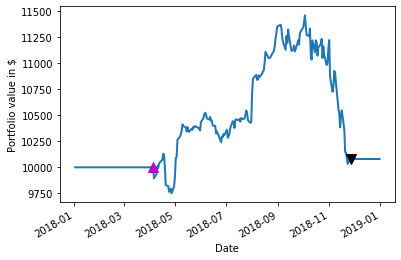

In [26]:
fig=plt.figure()
ax1=fig.add_subplot(111,ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1,lw=2.)

#buy signals
ax1.plot(portfolio.loc[signals.positions==1.0].index,portfolio.total[signals.positions==1.0],'^',markersize=10,color='m')

#plot sell signals
ax1.plot(portfolio.loc[signals.positions==-1.0].index,portfolio.total[signals.positions==-1.0],'v',markersize=10,color='k')

plt.show()

In [27]:
returns=portfolio['returns']
sharpe_ratio=np.sqrt(252)*(returns.mean()/returns.std())
print(sharpe_ratio)

0.13055941478512026


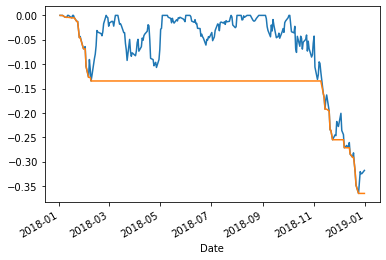

In [29]:
window=252
rolling_max=aapl.rolling(window,min_periods=1).max()
daily_drawdown=aapl/rolling_max-1.0
max_daily_drawdown=daily_drawdown.rolling(window,min_periods=1).min()
daily_drawdown.plot()
max_daily_drawdown.plot()

plt.show()